<a href="https://colab.research.google.com/github/elixirutkarsh/DCGAN/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from glob import glob
from PIL import Image
from IPython import display
import tensorflow.keras as kr
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

In [2]:
BATCH_SIZE = 128
LATENT_DIM = 100
SAMPLE_INTERVAL = 200
EPOCHS = 10000

In [3]:
def generate_gif(gif_name='mnist_gan.gif', pattern='image*.png'):
    with imageio.get_writer(gif_name, mode='I') as writer:
        filenames = glob(pattern)
        filenames = sorted(filenames)
        last = -1
        for i,filename in enumerate(filenames):
            frame = 2*(i**0.5)
            if round(frame) > round(last):
                last = frame
            else:
                continue
            image = imageio.imread(filename)
            writer.append_data(image)

        image = imageio.imread(filename)
        writer.append_data(image)

    # this is a hack to display the gif inside the notebook
    os.system('cp {} {}.png'.format(gif_name, gif_name))
def sample_images(generator, epoch, save=True, name='mnist'):
    """ Sample images from generator, plot them and save as png"""

    noise = np.random.normal(size=(5 * 5, LATENT_DIM))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5     # Rescale images 0-1

    fig, axs = plt.subplots(5, 5)
    c = 0
    for i in range(5):
        for j in range(5):
            axs[i,j].imshow(gen_imgs[c, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            c += 1

    if save:
        fig.savefig("{}_{}.png".format(name, epoch))
        plt.close()
    else:
        plt.show()

In [4]:
(X, _), (_, _) = kr.datasets.mnist.load_data()

X = X.reshape(X.shape[0], 28, 28, 1).astype('float32')
X = (X - 127.5) / 127.5 # Normalize the images to [-1, 1]

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
def build_generator(output_shape=(28, 28, 1)):
    model = kr.Sequential(name='generator')

    model.add(kr.layers.Dense(256, input_shape=(LATENT_DIM, )))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.BatchNormalization(momentum=0.8))

    model.add(kr.layers.Dense(512))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.BatchNormalization(momentum=0.8))

    model.add(kr.layers.Dense(1024))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.BatchNormalization(momentum=0.8))

    model.add(kr.layers.Dense(np.prod(output_shape), activation='tanh'))
    model.add(kr.layers.Reshape(output_shape))

    return model


generator = build_generator()
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                         

In [12]:
from glob import glob
from PIL import Image
from IPython import display
import tensorflow.keras as kr
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

BATCH_SIZE = 128
LATENT_DIM = 100
SAMPLE_INTERVAL = 200
EPOCHS = 10000

def generate_gif(gif_name='mnist_gan.gif', pattern='image*.png'):
    with imageio.get_writer(gif_name, mode='I') as writer:
        filenames = glob(pattern)
        filenames = sorted(filenames)
        last = -1
        for i, filename in enumerate(filenames):
            frame = 2 * (i ** 0.5)
            if round(frame) > round(last):
                last = frame
            else:
                continue
            image = imageio.imread(filename)
            writer.append_data(image)

        image = imageio.imread(filename)
        writer.append_data(image)

    # this is a hack to display the gif inside the notebook
    os.system('cp {} {}.png'.format(gif_name, gif_name))

def sample_images(generator, epoch, save=True, name='mnist'):
    """ Sample images from generator, plot them and save as png"""
    noise = np.random.normal(size=(5 * 5, LATENT_DIM))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images 0-1

    fig, axs = plt.subplots(5, 5)
    c = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(gen_imgs[c, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            c += 1

    if save:
        fig.savefig("{}_{}.png".format(name, epoch))
        plt.close()
    else:
        plt.show()

(X, _), (_, _) = kr.datasets.mnist.load_data()

X = X.reshape(X.shape[0], 28, 28, 1).astype('float32')
X = (X - 127.5) / 127.5  # Normalize the images to [-1, 1]

def build_generator(output_shape=(28, 28, 1)):
    model = kr.Sequential(name='generator')

    model.add(kr.layers.Dense(256, input_shape=(LATENT_DIM,)))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.BatchNormalization(momentum=0.8))

    model.add(kr.layers.Dense(512))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.BatchNormalization(momentum=0.8))

    model.add(kr.layers.Dense(1024))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.BatchNormalization(momentum=0.8))

    model.add(kr.layers.Dense(np.prod(output_shape), activation='tanh'))
    model.add(kr.layers.Reshape(output_shape))

    return model

generator = build_generator()
generator.summary()

def build_discriminator(input_shape=(28, 28, 1)):
    model = kr.Sequential(name='discriminator')

    model.add(kr.layers.Flatten(input_shape=input_shape))
    model.add(kr.layers.Dense(512))
    model.add(kr.layers.LeakyReLU(alpha=0.2))

    model.add(kr.layers.Dense(256))
    model.add(kr.layers.LeakyReLU(alpha=0.2))

    model.add(kr.layers.Dense(1, activation='sigmoid'))

    return model

discriminator = build_discriminator()
discriminator.summary()

optimizer = kr.optimizers.Adam(0.0002, 0.5)

discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])
discriminator.trainable = False  # For GAN we will only train the generator

z = kr.Input(shape=(LATENT_DIM,))
valid = discriminator(generator(z))

model = kr.Model(z, valid)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(0.0002, 0.5))
model.summary()

# Adversarial ground truths
valid_labels = np.ones((BATCH_SIZE, 1))
fake_labels = np.zeros((BATCH_SIZE, 1))

for epoch in range(EPOCHS):
    noise = np.random.normal(size=(BATCH_SIZE, LATENT_DIM))

    # Shuffle and batch data
    indices = np.random.randint(0, X.shape[0], BATCH_SIZE)
    imgs = X[indices]

    loss_real = discriminator.train_on_batch(imgs, valid_labels)
    loss_fake = discriminator.train_on_batch(generator.predict(noise), fake_labels)
    d_loss, d_acc = 0.5 * np.add(loss_real, loss_fake)

    noise = np.random.normal(size=(BATCH_SIZE, LATENT_DIM))
    g_loss = model.train_on_batch(noise, valid_labels)
    display.clear_output(wait=True)
    print("Epoch : %d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss, 100 * d_acc, g_loss))

    # If at save interval => save generated image samples
    if epoch % SAMPLE_INTERVAL == 0:
        sample_images(generator, epoch, name='./mnist')


Epoch : 9999 [D loss: 0.680231, acc.: 60.94%] [G loss: 0.880927]


1/1 [==============================] - 0s 25ms/step


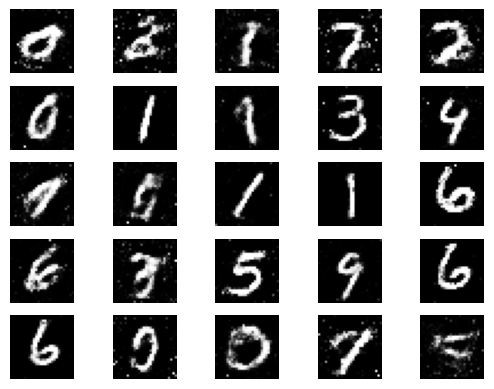

In [13]:
sample_images(generator, None, save=False)

<ipython-input-12-70a366ca5927>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-12-70a366ca5927>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


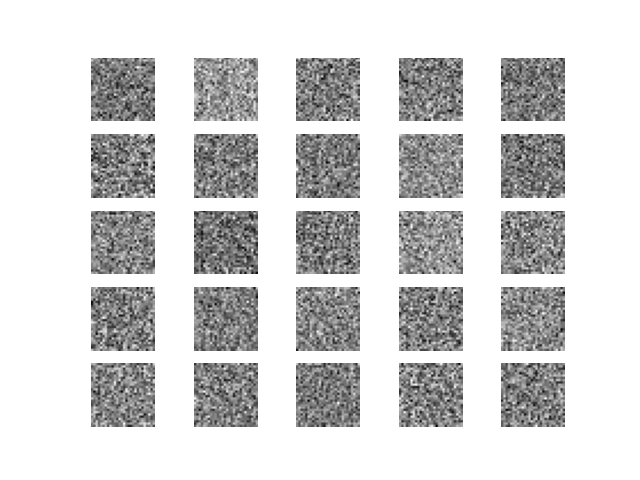

In [15]:
generate_gif(gif_name='mnist_gan.gif', pattern='mnist*.png')
display.Image(filename="mnist_gan.gif.png")


In [16]:
(X, _), (_, _) = kr.datasets.fashion_mnist.load_data()

X = X.reshape(X.shape[0], 28, 28, 1).astype('float32')
X = (X - 127.5) / 127.5 # Normalize the images to [-1, 1]

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
def generator_model():
    model = kr.Sequential()

    model.add(kr.layers.Dense(7 * 7 * 128, activation="relu", input_shape=(LATENT_DIM,)))
    model.add(kr.layers.Reshape((7, 7, 128)))

    model.add(kr.layers.UpSampling2D())
    model.add(kr.layers.Conv2D(128, (3, 3), padding='same'))
    model.add(kr.layers.BatchNormalization(momentum=0.8))
    model.add(kr.layers.ReLU())

    model.add(kr.layers.UpSampling2D())
    model.add(kr.layers.Conv2D(64, (3, 3), padding='same'))
    model.add(kr.layers.BatchNormalization(momentum=0.8))
    model.add(kr.layers.ReLU())

    model.add(kr.layers.Conv2D(1, (3, 3), padding='same', activation='tanh'))

    return model


generator = generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       147584    
                                                                 
 batch_normalization_9 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 14, 14, 128)       0

In [18]:
def discriminator_model():
    model = kr.Sequential()

    model.add(kr.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.Dropout(0.25))

    model.add(kr.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    # model.add(kr.layers.ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(kr.layers.BatchNormalization(momentum=0.8))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.Dropout(0.25))

    model.add(kr.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(kr.layers.BatchNormalization(momentum=0.8))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.Dropout(0.25))

    model.add(kr.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(kr.layers.BatchNormalization(momentum=0.8))
    model.add(kr.layers.LeakyReLU(alpha=0.2))
    model.add(kr.layers.Dropout(0.25))

    model.add(kr.layers.Flatten())
    model.add(kr.layers.Dense(1, activation='sigmoid'))

    return model


discriminator = discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_11 (Bat  (None, 7, 7, 64)         256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 7, 7, 64)          0         
                                                      

In [19]:
optimizer = kr.optimizers.Adam(0.0002, 0.5)

discriminator.compile(loss='binary_crossentropy', optimizer=optimizer,  metrics=['acc'])
discriminator.trainable = False    # For GAN we will only train the generator

z = kr.Input(shape=(LATENT_DIM,))
valid = discriminator(generator(z))

model = kr.Model(z, valid)
model.compile(loss='binary_crossentropy', optimizer=optimizer)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         856193    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 390657    
                                                                 
Total params: 1,246,850
Trainable params: 855,809
Non-trainable params: 391,041
_________________________________________________________________


In [ ]:
# Adversarial ground truths
valid_labels = np.ones((BATCH_SIZE, 1))
fake_labels = np.zeros((BATCH_SIZE, 1))

for epoch in range(EPOCHS):
    noise = np.random.normal(size=(BATCH_SIZE, LATENT_DIM))

    # Shuffle and batch data
    imgs = X[np.random.randint(0, X.shape[0], BATCH_SIZE)]

    loss_real = discriminator.train_on_batch(imgs, valid_labels)
    loss_fake = discriminator.train_on_batch(generator.predict(noise), fake_labels)
    d_loss, d_acc = 0.5 * np.add(loss_real, loss_fake)

    noise = np.random.normal(size=(BATCH_SIZE, LATENT_DIM))
    g_loss = model.train_on_batch(noise, valid_labels)
    display.clear_output(wait=True)
    print ("Epoch : %d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss, 100*d_acc, g_loss))

    # If at save interval => save generated image samples
    if epoch % SAMPLE_INTERVAL == 0:
        sample_images(generator, epoch, name='../working/fmnist')

1/1 [==============================] - 0s 270ms/step


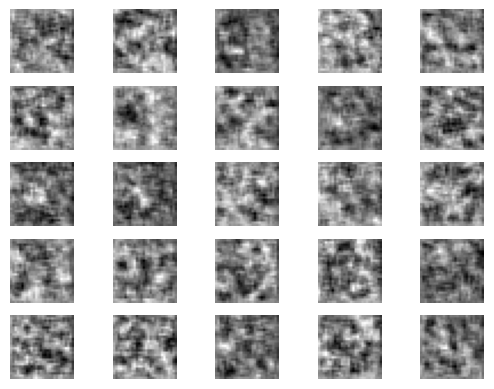

In [20]:
sample_images(generator, None, save=False, name='../working/fmnist')